In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import random

In [7]:
#reading data
data=pd.read_csv('iot_telemetry_data.csv')
print(data.shape)
data.head()

(405184, 9)


,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [8]:
data.drop('ts',axis=1,inplace=True)
data.drop('device',axis=1,inplace=True)
data.drop('light',axis=1,inplace=True)
data.drop('motion',axis=1,inplace=True)

In [9]:
data.head()

,co,humidity,lpg,smoke,temp
0,0.004956,51.000000,0.007651,0.020411,22.700000
1,0.002840,76.000000,0.005114,0.013275,19.700001
2,0.004976,50.900000,0.007673,0.020475,22.600000
3,0.004403,76.800003,0.007023,0.018628,27.000000
4,0.004967,50.900000,0.007664,0.020448,22.600000


In [10]:
data.isnull()

,co,humidity,lpg,smoke,temp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
405179,False,False,False,False,False
405180,False,False,False,False,False
405181,False,False,False,False,False
405182,False,False,False,False,False


In [11]:
data.isnull().sum()

co          0
humidity    0
lpg         0
smoke       0
temp        0
dtype: int64

<AxesSubplot:>

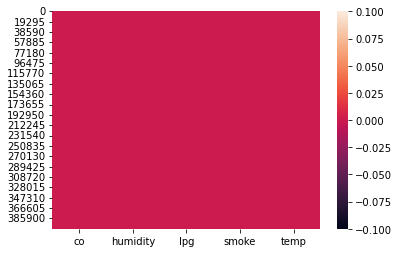

In [12]:
sns.heatmap(data.isnull())

In [13]:
X=data.drop('temp',axis=1)
y=data.temp

In [43]:
X,y

(              co   humidity       lpg     smoke
 0       0.004956  51.000000  0.007651  0.020411
 1       0.002840  76.000000  0.005114  0.013275
 2       0.004976  50.900000  0.007673  0.020475
 3       0.004403  76.800003  0.007023  0.018628
 4       0.004967  50.900000  0.007664  0.020448
 ...          ...        ...       ...       ...
 405179  0.003745  75.300003  0.006247  0.016437
 405180  0.005882  48.500000  0.008660  0.023301
 405181  0.004540  75.699997  0.007181  0.019076
 405182  0.003745  75.300003  0.006247  0.016437
 405183  0.005914  48.400000  0.008695  0.023400
 
 [405184 rows x 4 columns],
 0         22.700000
 1         19.700001
 2         22.600000
 3         27.000000
 4         22.600000
             ...    
 405179    19.200001
 405180    22.200000
 405181    26.600000
 405182    19.200001
 405183    22.200000
 Name: temp, Length: 405184, dtype: float64)

# Fixing non-linear classification data

In [14]:
for i in range(len(y)):
    if 0<=y[i]<5:
        y[i]=1
    elif 5<=y[i]<10:
        y[i]=6
    elif 10<=y[i]<15:
        y[i]=13
    elif 15<=y[i]<19:
        y[i]=19
    elif 19<=y[i]<20:
        y[i]=20
    elif 20<=y[i]<22:
        y[i]=22
    elif 22<=y[i]<23:
        y[i]=23
    elif 23<=y[i]<25:
        y[i]=24
    elif 25<=y[i]<28:
        y[i]=27
    elif 28<=y[i]<30:
        y[i]=29
    elif 30<=y[i]<31:
        y[i]=30

# Train and Test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
model.fit(X_train, y_train)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_train.value_counts()

23.0    84056
20.0    63560
22.0    36012
27.0    33136
24.0    32989
29.0    12322
19.0     7317
30.0     1894
6.0       105
1.0        49
13.0       33
Name: temp, dtype: int64

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_train,model.predict(X_train)))

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        49
         6.0       0.00      0.00      0.00       105
        13.0       0.00      0.00      0.00        33
        19.0       0.00      0.00      0.00      7317
        20.0       0.71      1.00      0.83     63560
        22.0       0.00      0.00      0.00     36012
        23.0       0.56      0.98      0.72     84056
        24.0       0.21      0.04      0.07     32989
        27.0       0.46      0.32      0.38     33136
        29.0       0.00      0.00      0.00     12322
        30.0       0.00      0.00      0.00      1894

    accuracy                           0.58    271473
   macro avg       0.18      0.21      0.18    271473
weighted avg       0.42      0.58      0.47    271473



C:\Users\akshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
LR_score=accuracy_score(y_train,model.predict(X_train))
LR_score

0.5816637381986423

# KNN

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
error_rate = []

# Will take some time
for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

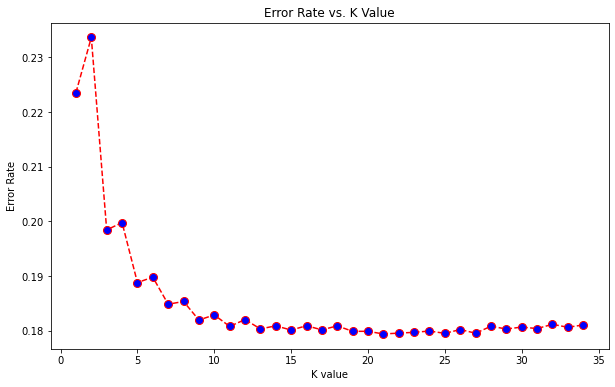

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [29]:

classifier=KNeighborsClassifier(n_neighbors=19)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [30]:
y_pred=classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
Knn_score=accuracy_score(y_test,y_pred)
Knn_score

0.8200821174024575

# Naive Bayas

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB().fit(X_train, y_train)

In [34]:
model_n = GaussianNB().fit(X_train, y_train)

In [35]:
y_pred_n=model_n.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
nb_score=accuracy_score(y_test,y_pred_n)
nb_score

0.6061206632214253

# Final scores

In [37]:
print("Logistic regression accuracy score:", LR_score)
print("K nearest neighbors accuracy score:", Knn_score)
print("naive bayes accuracy score:        ", nb_score)

Logistic regression accuracy score: 0.5816637381986423
K nearest neighbors accuracy score: 0.8200821174024575
naive bayes accuracy score:         0.6061206632214253


# So by this we can say that KNN having more accuracy and works better in this data set